In [16]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Plot and find the minimum of
\begin{equation}
f(x) = (x - 2)^2
\end{equation}

## Derivative of a function

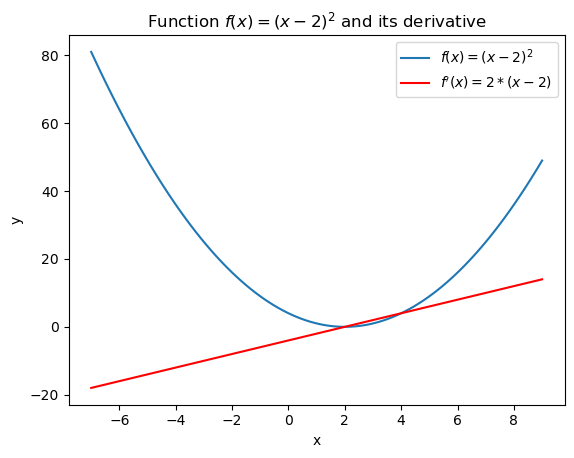

In [19]:
def f(x):
    """ Manualy  define the function."""
    return torch.pow((x-2.0), 2)

def f_prime(x):
    """ Manualy  define the derivative of the function."""
    return 2*(x-2)

x_axis_vals = np.linspace(-7,9,100) 
y_axis_vals = f(torch.tensor(x_axis_vals)).numpy()
y_axis_vals_derivative = f_prime(torch.tensor(x_axis_vals)).numpy()

sns.lineplot(x=x_axis_vals, y=y_axis_vals, label='$f(x)=(x-2)^2$')
sns.lineplot(x=x_axis_vals, y=y_axis_vals_derivative, label="$f'(x)=2*(x-2)$", color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and its derivative at x=2')
plt.legend()
plt.show()



<Axes: >

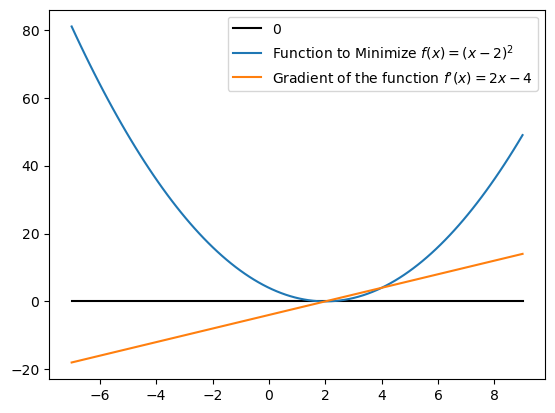

In [25]:
def fP(x):
        """ Manualy  define the function."""
        return 2*x-4

# Plot the function and its derivative with  a black line at y=0, so we can see where the function is positive and negative
y_axis_vals_p = fP(torch.tensor(x_axis_vals)).numpy()

sns.lineplot(x=x_axis_vals, y=[0.0]*len(x_axis_vals), label="0", color="black")
sns.lineplot(x=x_axis_vals, y=y_axis_vals, label="Function to Minimize $f(x) = (x-2)^2$") 
sns.lineplot(x=x_axis_vals, y=y_axis_vals_p, label="Gradient of the function $f’(x)=2 x - 4$")


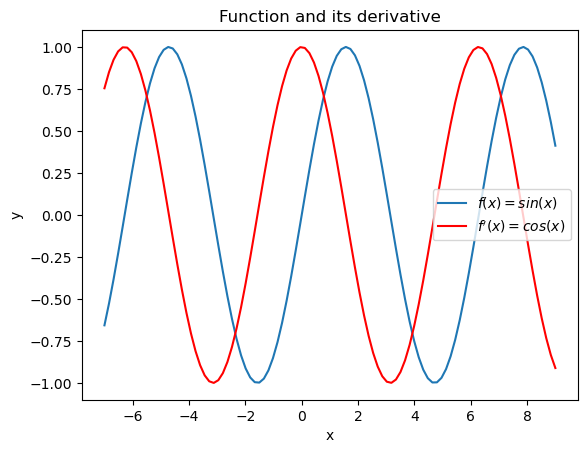

In [23]:
def plot_function_and_derivative(f, df, f_symbolic, df_symbolic, x_range=(-7,9), num_points=100):
    
    x_axis_vals = np.linspace(x_range[0], x_range[1], num_points) 
    y_axis_vals = f(torch.tensor(x_axis_vals)).numpy()
    y_axis_vals_derivative = df(torch.tensor(x_axis_vals)).numpy()

    sns.lineplot(x=x_axis_vals, y=y_axis_vals, label=f'$f(x)={f_symbolic}$')
    sns.lineplot(x=x_axis_vals, y=y_axis_vals_derivative, label=f"$f'(x)={df_symbolic}$", color='red')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Function and its derivative')
    plt.legend()
    plt.show()

# Now you can use this function to plot any function and its derivative
def g(x):
    """ Manualy  define the function."""
    return torch.sin(x)

def g_prime(x):
    """ Manualy  define the derivative of the function."""
    return torch.cos(x)

plot_function_and_derivative(g, g_prime, 'sin(x)', 'cos(x)')
    

In [11]:
# create a tensor apply the finction f to it
x = torch.tensor([1.0, 2.0, 3.0])
y = f(x)
print(f"function f(x): {y}")
y_prime = f_prime(x)
print(f"the derivative of the function f(x): {y_prime}")

function f(x): tensor([1., 0., 1.])
the derivative of the function f(x): tensor([-2.,  0.,  2.])


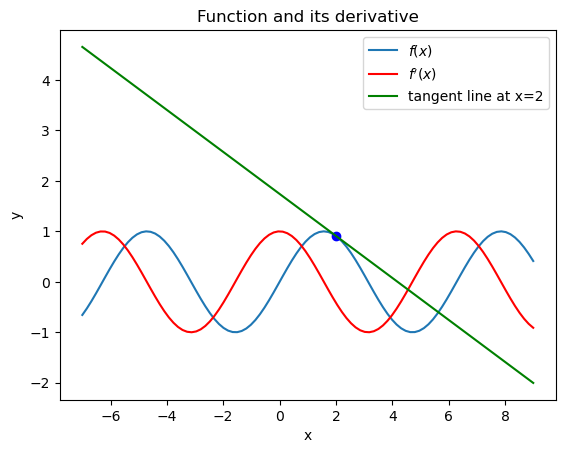

In [24]:
def plot_function_and_derivative(f, df, x_point, x_range=(-7,9), num_points=100):
    
    x_axis_vals = np.linspace(x_range[0], x_range[1], num_points) 
    y_axis_vals = f(torch.tensor(x_axis_vals)).numpy()
    y_axis_vals_derivative = df(torch.tensor(x_axis_vals)).numpy()

    sns.lineplot(x=x_axis_vals, y=y_axis_vals, label='$f(x)$')
    sns.lineplot(x=x_axis_vals, y=y_axis_vals_derivative, label="$f'(x)$", color='red')

    # Compute the derivative at x_point and plot it as a point
    y_point = f(torch.tensor([x_point])).numpy()
    plt.plot(x_point, y_point, 'bo')  # 'bo' makes the point blue and circular

    # Calculate the slope and intercept of the line passing through (x_point, y_point) and (x_point+1, y_point+df)
    slope = df(torch.tensor([x_point])).numpy()
    intercept = y_point - slope * x_point

    # Calculate the y values for the line
    y_line = slope * x_axis_vals + intercept

    # Plot the line
    sns.lineplot(x=x_axis_vals, y=y_line, label='tangent line at x=' + str(x_point), color='green')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Function and its derivative')
    plt.legend()
    plt.show()

# Now you can use this function to plot any function and its derivative
def g(x):
    return torch.sin(x)

def g_prime(x):
    return torch.cos(x)

plot_function_and_derivative(g, g_prime, 2)

## Automatic differentiation

In [26]:
x = torch.tensor([-3.5], requires_grad=True) 
value = f(x) 
print(value)

tensor([30.2500], grad_fn=<PowBackward0>)


In [27]:
print(x.grad)

None


## Minimizing a function  with  derivatives

Use PyTorch automatic differentiation to find the minimum of a cost function $f(x)$ a vector x, the weight values for the previous activation layer, updating the current solution $x_c = x_c - lr.f'(x_c)$
to numerically find the answer $f'(2)=0$

PyTorch Tensor object has a child member .grad   that   stores the  computed  gradients for  that variable, and .data member that holds the value

In [29]:
# meechanics of authograd
x = torch.tensor([-3.5], requires_grad=True)

x_cur = x.clone() 
# to start the loop make the "previous" solution different enough
x_prev = x_cur*100
# threshold to compare previous and current solutions
epsilon = 1e-5

lr = 0.1

while torch.linalg.norm(x_cur-x_prev) > epsilon:
    # make a clone so prrevious and  current  soolutions dont point to the same object  
    x_prev = x_cur.clone()
    
    # compute function, gradient and update the solution
    value = f(x)
    print(f"current value in data field: {x.data}")
    # compute the gradient of the  function at the current solution
    value.backward() 
    print(f"current value gradient field: {x.data}")
    # x_c = x_c - lr * grad_f(x_c)
    x.data -= lr * x.grad
    print(f"updated value in data field: {x.data}")
    
    # zero the gradient
    x.grad.zero_()
    # update the current solution to the new solution
    x_cur = x.data

    print(f"updated  solution: {x_cur}")
    print()

current value in data field: tensor([-3.5000])
current value gradient field: tensor([-3.5000])
updated value in data field: tensor([-2.4000])
updated  solution: tensor([-2.4000])

current value in data field: tensor([-2.4000])
current value gradient field: tensor([-2.4000])
updated value in data field: tensor([-1.5200])
updated  solution: tensor([-1.5200])

current value in data field: tensor([-1.5200])
current value gradient field: tensor([-1.5200])
updated value in data field: tensor([-0.8160])
updated  solution: tensor([-0.8160])

current value in data field: tensor([-0.8160])
current value gradient field: tensor([-0.8160])
updated value in data field: tensor([-0.2528])
updated  solution: tensor([-0.2528])

current value in data field: tensor([-0.2528])
current value gradient field: tensor([-0.2528])
updated value in data field: tensor([0.1978])
updated  solution: tensor([0.1978])

current value in data field: tensor([0.1978])
current value gradient field: tensor([0.1978])
updated v